In [1]:
# loading packages
import numpy as np 
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('./F2F Donors1023(Excel editing).csv',encoding = 'big5')
df = df[df['Before 2019/6/30'] == 1]
df.head()
print(df.shape)

(20107, 32)


In [2]:
#drop rows that contain nan values
#df.dropna(inplace=True)
#df.reset_index(inplace=True)

y = df['3M Cancellation']
#df = df.drop(['3M Cancellation','6M Cancellation','All Cancellation'],axis=1)
#df.head()

# EDA

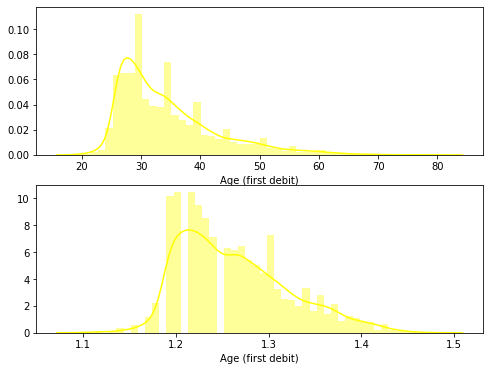

In [3]:
%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox
age_transform = boxcox(df['Age (first debit)'],0)

plt.figure(1,figsize=(8, 6))
plt.subplot(211)
sns.distplot(df['Age (first debit)'],color='yellow')
plt.subplot(212)
sns.distplot(np.log(np.log(1+df['Age (first debit)'])),color = 'yellow')



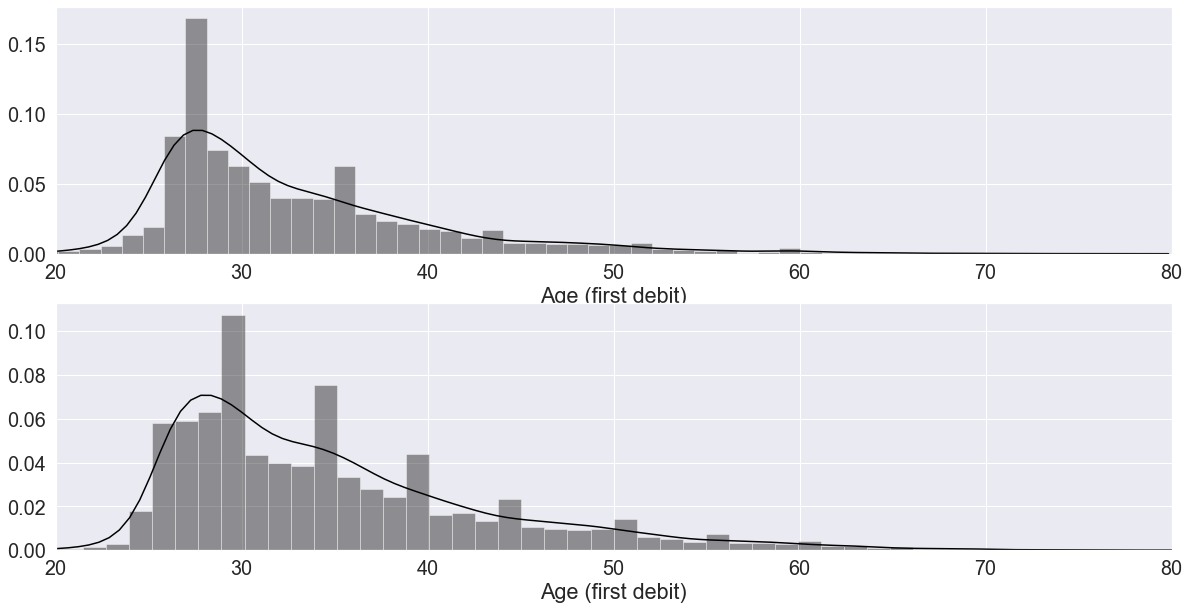

In [4]:
plt.figure(1,figsize=(20,10))
sns.set(font_scale=1.8)
plt.subplot(211)
sns.distplot(df[df['3M Cancellation']==1]['Age (first debit)'],color='black',)
plt.xlim(20,80)
plt.subplot(212)
sns.distplot(df[df['3M Cancellation']==0]['Age (first debit)'],color='black',)
plt.xlim(20,80)
plt.savefig('Age2.png')

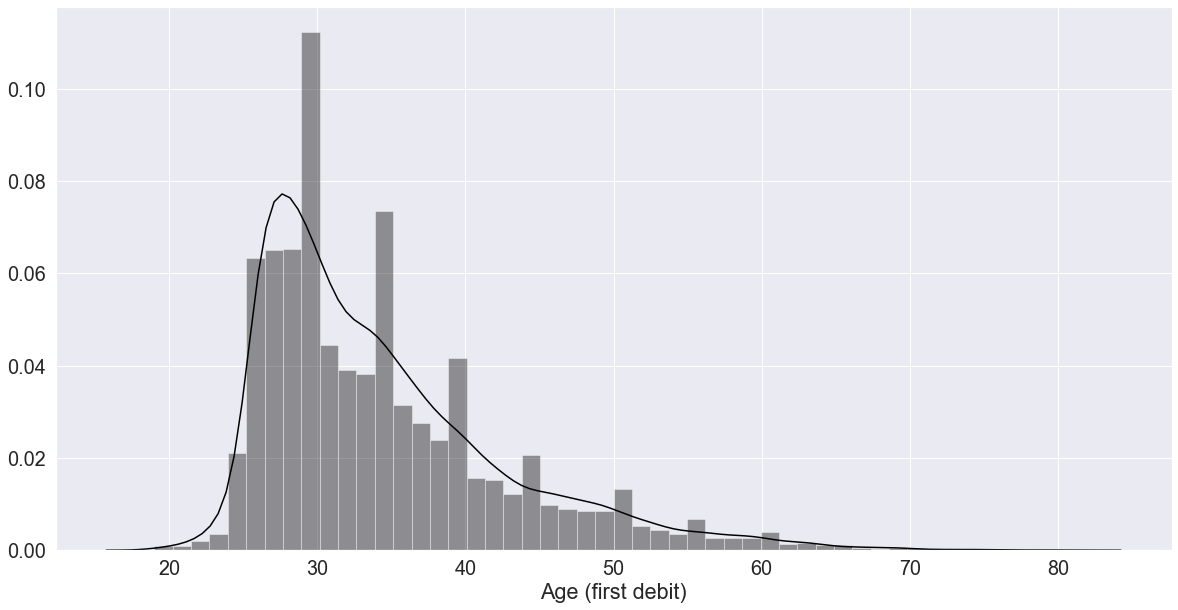

In [5]:
plt.figure(1,figsize=(20,10))
sns.set(font_scale=1.8)
sns.distplot(df['Age (first debit)'],color='black')

plt.savefig('Age1.png')

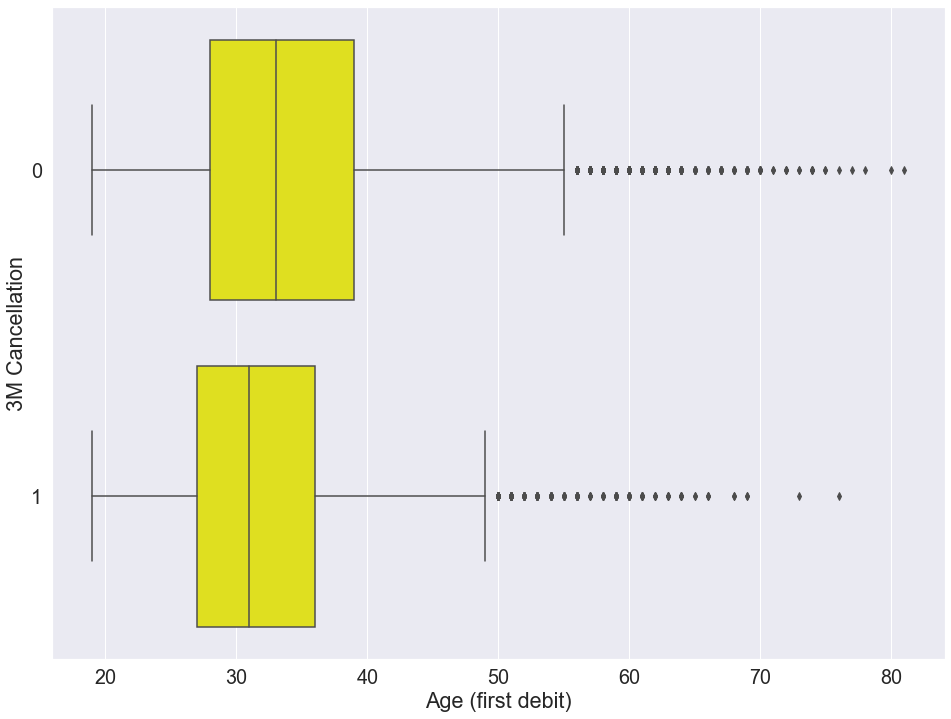

In [6]:
plt.figure(1,figsize=(16, 12))
sns.boxplot(x=df['Age (first debit)'],y=y,color='Yellow',orient="h")
plt.savefig('Age.png')

In [9]:
len(df[df['Age (first debit)'] >30][df['Age (first debit)']<=35].index)/df.shape[0]

0.24215447356641964

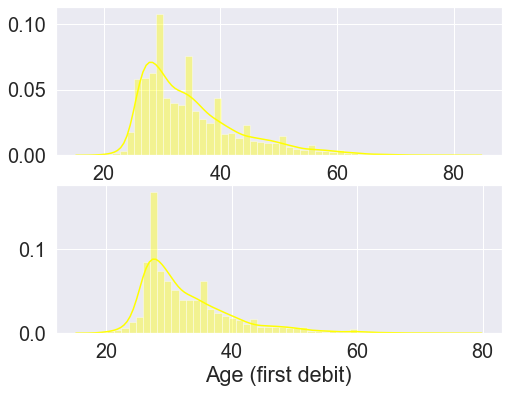

In [7]:
plt.figure(1,figsize=(8, 6))
plt.subplot(211)
sns.distplot(df[df['3M Cancellation']==0]['Age (first debit)'],color='yellow')
plt.subplot(212)
sns.distplot(df[df['3M Cancellation']==1]['Age (first debit)'],color = 'yellow')

In [193]:
#add region
df['Region'] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    df['Region'][i] = str(df['Postal Code'][i][0])

In [76]:
# get first debit month
df['First Debit Month'] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    df['First Debit Month'][i] = df['First Debit Date'][i].split('/')[1]

In [116]:
# get first debit year
df['First Debit Year'] = np.zeros(df.shape[0])
for i in range(df.shape[0]):
    df['First Debit Year'][i] = df['First Debit Date'][i].split('/')[0]

In [177]:
for i in range(df.shape[0]):
    if df['Age (first debit)'][i] > 60:
        df['Age (first debit)'][i] = 60

In [ ]:
%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import boxcox
age_transform = boxcox(df['Age (first debit)'],0)

plt.figure(1,figsize=(8, 6))
plt.subplot(211)
sns.distplot(df['Age (first debit)'],color='yellow')
plt.subplot(212)
sns.distplot(np.log(np.log(df['Age (first debit)'])),color = 'yellow')

plt.figure(1,figsize=(8, 6))
plt.subplot(211)
sns.distplot(df['Give Size'],color='yellow')
plt.subplot(212)
sns.distplot(np.log(np.log(df['Give Size'])),color = 'yellow')


In [ ]:
plt.figure(1,figsize=(8, 6))
sns.boxplot(x=df['3M Cancellation'],y = df['Age (first debit)'])

In [154]:
df['Give Size'].head()

0    1300
1     700
2     500
3     500
4     500
Name: Give Size, dtype: int64

In [155]:
df['Give Size'].apply(lambda x: x >=500 and x <1000).astype(int)

0        0
1        1
2        1
3        1
4        1
        ..
20102    0
20103    1
20104    1
20105    1
20106    0
Name: Give Size, Length: 20107, dtype: int32

In [11]:
X = pd.DataFrame()


X['CREDIT'] = pd.get_dummies(df['Payment Method'])['CREDIT'] 

#X['CREDIT'] = pd.get_dummies(df['Payment Method'])['CREDIT']
#X['Give Size'] = df['Give Size']
#X['Age'] =df['Age (first debit)']

#X['Small Give'] = df['Give Size'].apply(lambda x: x <= 500).astype(int)
#X['Medium Give'] = df['Give Size'].apply(lambda x: x >500 and x <=1000).astype(int)
#X['Large Give'] = df['Give Size'].apply(lambda x: x > 1000).astype(int)

X['Give Size'] = df['Give Size']

X['Rich'] = pd.get_dummies(df['Dist.'])['松山區'] + pd.get_dummies(df['Dist.'])['大安區'] +pd.get_dummies(df['Dist.'])['中山區']

X['Male'] = pd.get_dummies(df['Gender'])['男']
'''
#X['<=25'] = df['Age (first debit)'].apply(lambda x:x <=25).astype(int)
X['26-30'] = df['Age (first debit)'].apply(lambda x:x >25 and x <=30).astype(int)
X['31-35'] = df['Age (first debit)'].apply(lambda x:x >30 and x <=35).astype(int)
X['36-45'] = df['Age (first debit)'].apply(lambda x:x >35 and x <=45).astype(int)
X['46-55'] = df['Age (first debit)'].apply(lambda x:x >45 and x <=55).astype(int)
X['56+'] = df['Age (first debit)'].apply(lambda x:x >55).astype(int)
'''
X['Age'] = df['Age (first debit)']

X['<=25 and DEBIT'] = df['Age (first debit)'].apply(lambda x:x <= 25).astype(int) * pd.get_dummies(df['Payment Method'])['DEBIT'] 

X.head()

,CREDIT,Give Size,Rich,Male,Age,<=25 and DEBIT
0,1,1300,1,0,31,0
1,1,700,0,0,32,0
2,1,500,0,0,29,0
3,1,500,0,0,28,0
4,1,500,1,0,34,0


In [ ]:
#squre, cube and other interactive terms
columns_1 = ['CREDIT']
columns_2 = ['<25', '25-35', '35-45', '45-55', '55+']
for col_1 in columns_1:
    for col_2 in columns_2:
        X[col_1+'*'+col_2] = X[col_1]*X[col_2]

#X = X.drop(columns=['CREDIT*CREDIT'],axis=1)
X.head()

In [14]:
#feature selection
from sklearn.ensemble import RandomForestClassifier


feature_score = np.zeros(len(list(X.columns)))
for i in range(100):
    estimator = RandomForestClassifier(bootstrap=False)
    estimator.fit(X,y)
    feature_score = feature_score + np.array(estimator.feature_importances_)

In [15]:
feats = pd.Series(data=feature_score.flatten(), index=X.columns)
feats = feats.sort_values(ascending=False)
print('Feature importances:')
print(feats)

Feature importances:
Age               0.442003
CREDIT            0.265246
Give Size         0.229531
Rich              0.031114
Male              0.023674
<=25 and DEBIT    0.008432
dtype: float64


In [295]:
X['Give Size*Age'].std()

13302.287598219413

In [ ]:
#dealing with nan values
print(X.isnull().sum())
X.isnull().sum().sum()

In [42]:
result = pd.concat([y, X], axis=1, sort=False)
result.head()

,3M Cancellation,Give Size
0,0,1300
1,0,700
2,0,500
3,0,500
4,0,500


# Feature Engineering

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2)

In [17]:
from sklearn.preprocessing import MinMaxScaler
MMEncoder = MinMaxScaler()
for c in X.columns:
    MMEncoder.fit(X_train[c].values.reshape(-1, 1))
    X_train[c] = MMEncoder.transform(X_train[c].values.reshape(-1, 1))
    X_test[c] = MMEncoder.transform(X_test[c].values.reshape(-1, 1))
X_train.head()

,CREDIT,Give Size,Rich,Male,Age,<=25 and DEBIT
18965,1.0,0.047141,1.0,0.0,0.672131,0.0
6721,0.0,0.097292,1.0,1.0,0.245902,0.0
10205,1.0,0.097292,0.0,1.0,0.278689,0.0
2695,0.0,0.047141,0.0,0.0,0.163934,0.0
7923,0.0,0.047141,0.0,0.0,0.459016,0.0


In [163]:
#leaf encoding
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder

# 隨機森林擬合後, 再將葉編碼 (*.apply) 結果做獨熱 / 邏輯斯迴歸
rf = RandomForestClassifier(n_estimators=20, min_samples_split=10, min_samples_leaf=5, 
                            max_features=4, max_depth=3, bootstrap=True)
onehot = OneHotEncoder()
#lr = LogisticRegression(solver='lbfgs', max_iter=1000)

rf.fit(X_train, y_train)
#onehot.fit(rf.apply(train_X))
#lr.fit(onehot.transform(rf.apply(val_X)), val_Y)
onehot.fit(rf.apply(X_train))
onehot.transform(rf.apply(X_test))

<5027x160 sparse matrix of type '<class 'numpy.float64'>'
	with 100540 stored elements in Compressed Sparse Row format>

In [187]:
predict = np.array(predict)
predict.mean()

0.22538293216630198

# Train/Test Models

In [24]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
estimator = LogisticRegression(solver='lbfgs',max_iter=100,fit_intercept=False,class_weight={1:2})
#cross_val_score(estimator, X_train, y_train, cv=10, ).mean()
estimator.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={1: 2}, dual=False, fit_intercept=False,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
np.log(0.1)

-2.3025850929940455

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82      3736
           1       0.41      0.25      0.31      1291

    accuracy                           0.72      5027
   macro avg       0.59      0.56      0.57      5027
weighted avg       0.68      0.72      0.69      5027



In [27]:
estimator.fit(X_train,y_train)
i = 0
for col in X.columns:
    print(str(col) +' '+ str(estimator.coef_[0,i]))
    i+=1

CREDIT -0.6875622864144226
Give Size 4.966164689982859
Rich 0.08730892135661415
Male -0.0394550437399192
Age -0.9944216068935078
<=25 and DEBIT 0.34295410225472944


In [26]:
#support vector machine
from sklearn.svm import SVC
cw = 2
clf = SVC(gamma='auto',class_weight={1:cw})
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight={1: 2}, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [381]:
#class weight = 1
predict = clf.predict(X_test)
print 
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.74      1.00      0.85      3736
           1       0.00      0.00      0.00      1291

    accuracy                           0.74      5027
   macro avg       0.37      0.50      0.43      5027
weighted avg       0.55      0.74      0.63      5027



In [27]:
#class weight = 1.5
predict = clf.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3736
           1       0.41      0.32      0.36      1291

    accuracy                           0.71      5027
   macro avg       0.60      0.58      0.59      5027
weighted avg       0.69      0.71      0.70      5027



In [27]:
#class weight = 2
predict = clf.predict(X_test)
print('Class weight:%i'%cw)
print('\n')
print(classification_report(y_test, predict))

Class weight:2


              precision    recall  f1-score   support

           0       0.78      0.84      0.81      3736
           1       0.41      0.32      0.36      1291

    accuracy                           0.71      5027
   macro avg       0.60      0.58      0.59      5027
weighted avg       0.69      0.71      0.70      5027



In [368]:
#class weight = 2.5
predict = clf.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      3736
           1       0.40      0.35      0.37      1291

    accuracy                           0.70      5027
   macro avg       0.59      0.58      0.59      5027
weighted avg       0.69      0.70      0.69      5027



In [372]:
#class weight = 3
predict = clf.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.81      0.54      0.65      3736
           1       0.32      0.64      0.43      1291

    accuracy                           0.57      5027
   macro avg       0.57      0.59      0.54      5027
weighted avg       0.69      0.57      0.59      5027



In [ ]:
from sklearn.metrics import classification_report
#for i in range(len(classification_report(y_test, predict))):
    #print(str(i) + ' ' + classification_report(y_test, predict)[i])

#print(classification_report(y_test, predict))

In [36]:
from sklearn.ensemble import GradientBoostingClassifier

    
gbc = GradientBoostingClassifier(max_depth = 7,n_estimators=300)
gbc.fit(X_train,y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=7,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=300,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [37]:
predict = gbc.predict(X_test)
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.75      0.96      0.84      3736
           1       0.44      0.10      0.16      1291

    accuracy                           0.74      5027
   macro avg       0.60      0.53      0.50      5027
weighted avg       0.67      0.74      0.67      5027



In [190]:
predict = []
for i in range(gbc.predict_proba(X_test).shape[0]):
    if gbc.predict_proba(X_test)[i][0] > 0.5:
        predict.append(1)
    else:
        predict.append(0)
y_test = y_test.reset_index(drop=True)
#calculate accuracy score
score = 0
for i in range(y_test.shape[0]):
    if y_test[i] == predict[i]:
        score+=1
print(score/len(y_test))
#baseline 0.6980306345733042

0.2568132086731649


In [15]:
X_train.shape

(15080, 6)

In [28]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv1D(64,2,input_shape=(44,1)),
    #tf.keras.layers.MaxPooling1D(2),
    # Flatten the results to feed into a DNN
    #tf.keras.layers.Flatten(input_shape=X_train.shape[1:]),
    #tf.keras.layers.Conv1D(32,input_shape=X_train.shape[1:],kernel_size=(3,2)),
    tf.keras.layers.Dense(16, activation='relu',input_shape=X_train.shape[1:]),
    
    #tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(8, activation='relu',),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.01),
              #loss_weights={'output_1':1000},
              metrics=['acc'])

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                112       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(np.array(X_train), np.array(y_train), epochs=10, validation_data=(np.array(X_test),np.array(y_test)),batch_size = 5, )

Train on 15080 samples, validate on 5027 samples
Epoch 1/10
15080/15080 [==============================] - 6s 424us/sample - loss: 0.5558 - acc: 0.7436 - val_loss: 0.5499 - val_acc: 0.7432
Epoch 2/10
15080/15080 [==============================] - 5s 338us/sample - loss: 0.5538 - acc: 0.7442 - val_loss: 0.5504 - val_acc: 0.7432
Epoch 3/10
15080/15080 [==============================] - 6s 381us/sample - loss: 0.5531 - acc: 0.7442 - val_loss: 0.5492 - val_acc: 0.7432
Epoch 4/10
15080/15080 [==============================] - 5s 363us/sample - loss: 0.5517 - acc: 0.7442 - val_loss: 0.5514 - val_acc: 0.7432
Epoch 5/10
15080/15080 [==============================] - 6s 408us/sample - loss: 0.5523 - acc: 0.7442 - val_loss: 0.5506 - val_acc: 0.7432
Epoch 6/10
 3650/15080 [======>.......................] - ETA: 4s - loss: 0.5507 - acc: 0.7466

KeyboardInterrupt: 

In [58]:
thres = model.predict(np.array(X_test)).mean()
predict = 

0.23613836

In [78]:
try_out = np.linspace(0.2,0.3,50)
mean_list = []
for val in try_out:    
    test_mean = np.array(model.predict(np.array(X_test))>val).astype(int).mean()
    mean_list.append(test_mean)
mean_list = np.array(mean_list)

In [66]:
np.array(y_test).mean()

0.2568132086731649

In [79]:
mean_list

array([0.59996021, 0.59916451, 0.55460513, 0.55341158, 0.55301373,
       0.51362642, 0.51203501, 0.51203501, 0.47861548, 0.47563159,
       0.47483589, 0.47423911, 0.44221205, 0.44062065, 0.44042172,
       0.42231947, 0.40362045, 0.40302367, 0.40222797, 0.37000199,
       0.36920629, 0.36860951, 0.36761488, 0.33777601, 0.33638353,
       0.33638353, 0.33518997, 0.29818978, 0.29639944, 0.29620052,
       0.29560374, 0.25820569, 0.25800676, 0.25800676, 0.25760891,
       0.22677541, 0.22637756, 0.22637756, 0.22617864, 0.21265168,
       0.21245276, 0.2120549 , 0.2120549 , 0.2042968 , 0.20409787,
       0.20389895, 0.20389895, 0.20051721, 0.20011936, 0.19992043])

In [82]:
print(classification_report(y_test, np.array(model.predict(np.array(X_test))>0.272).astype(int)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      3736
           1       0.40      0.36      0.38      1291

    accuracy                           0.70      5027
   macro avg       0.59      0.59      0.59      5027
weighted avg       0.69      0.70      0.69      5027



In [17]:
from ckiptagger import data_utils, construct_dictionary, WS, POS, NER
ws = WS("./data")
pos = POS("./data")
ner = NER("./data")
group_tag = []
for tag in df['Group'][11].split(','):
    group_tag.append(tag)
ws_group = ws(group_tag)
pos_group = pos(ws_group)
print(ws_group)
print(pos_group)

[['《', '捐款', '》'], ['《', '捐款', '》', '2017', '/', '05'], ['《', 'F2F', '》', '台灣', '婚姻', '平權', '法案'], ['已', '寄送'], ['收據', '資料'], ['2019', '新年', '賀卡'], ['2018', ' W4', 'R wrapped up for donor']]
[['PARENTHESISCATEGORY', 'VB', 'PARENTHESISCATEGORY'], ['PARENTHESISCATEGORY', 'VB', 'PARENTHESISCATEGORY', 'Nd', 'FW', 'Neu'], ['PARENTHESISCATEGORY', 'FW', 'PARENTHESISCATEGORY', 'Nc', 'Na', 'VH', 'Na'], ['D', 'VD'], ['Na', 'Na'], ['Neu', 'Nd', 'Na'], ['Neu', 'FW', 'FW']]


In [32]:
#create new tag features
df['China_related'] = np.zeros(len(df['Group']))
China_keywords = ['中國','香港','台灣']
import warnings
warnings.filterwarnings('ignore')
for i in range(df.shape[0]):
    group_tag = []
    if df['Group'].isnull()[i] == False:
        for tag in df['Group'][i].split(','):
            group_tag.append(tag)
        ws_group = ws(group_tag)
        for tag in ws_group:
            for keyword in China_keywords:
                if keyword in tag:
                    df['China'][i] += 1